In [1]:
from Summarizer import Summarizer
from transformer import EncoderDecoder
from attention_map import attention_map
import torch
# import pandas as pd
from sacremoses import MosesTokenizer
from preprocessing_emb import get_model_and_tokenizer

In [2]:
tokenizer, _ = get_model_and_tokenizer()
model = EncoderDecoder(word_field=None, d_model=312, tokenizer=tokenizer)
load = torch.load('model.pt')
model.load_state_dict(load['model_state_dict'])

c:\Users\Vladlen\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


<All keys matched successfully>

In [3]:
def test_predict(model,input_text):
    summarizer = Summarizer(model=model)
    predicted_text = summarizer.predict(input_text)
    print(predicted_text)


In [4]:
input_text = "Букмекеры заявили о том, что один из поединков российской баскетбольной Суперлиги 3 (четвертый по силе дивизион национального чемпионата) может носить договорной характер. Об этом сообщает «Рейтинг Букмекеров». Речь идет о матче, состоявшемся 25 февраля между клубами «Тегас» (Динской район, Краснодарский край) и «Эльбрус» (Черкесск). Подозрение у букмекеров  вызвал необычный интерес со стороны некоторых местных профессиональных баскетболистов, которые стали единственными клиентами одной из международных контор и сделали ставки на матч. Для всех из них ставки стали первыми после регистрации на сайте. Общая сумма составила 120 тысяч рублей. Личности игроков не сообщаются. Поединок завершился победой «Тегаса» со счетом 85:80, который занимает последнее место в чемпионате. «Эльбрус» находится строчкой выше."
test_predict(model,input_text)

снова вновь вновь вновь вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь


In [5]:
input_text = "Российский форвард Евгений Малкин стал четвертым игроком в истории клуба «Питтсбург Пингвинс», которому удалось достигнуть отметки в 700 набранных очков (268 шайб плюс 432 передачи) в Национальной хоккейной лиге (НХЛ). Об этом сообщает официальный сайт лиги. Этот рубеж покорился ему в домашней игре регулярного чемпионата с «Эдмонтон Ойлерс» (6:4). Россиянин отметился в этой встрече результативной передачей. До Малкина столько же очков в составе «Питтсбурга» набирали Марио Лемье (1984-2006), Яромир Ягр (1990-2001) и нынешний капитан команды Сидни Кросби. В нынешнем сезоне на счету Малкина 28 заброшенных шайб и 40 голевых передач в 62 встречах регулярного чемпионата. «Питтсубрг» занимает пятое место в Восточной конференции."
test_predict(model, input_text)

снова вновь вновь вновь вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь


In [6]:
input_text = "В Туве потерпел аварию вертолет Ми-8, на борту которого находились 14 человек. Все они остались живы и были эвакуированы с места происшествия, передает ""Интерфакс"". Как сообщили информагентству в Управлении информации МЧС РФ, вертолет с геологами вылетел из Кызыла в направлении пункта Малый Енисей. В 12:05 по московскому времени связь с экипажем была потеряна. Через несколько часов Ми-8 был обнаружен в районе одной из сопок в устье реки Ханга. Машина лежит на боку. Причины аварии и другие подробности происшествия пока неизвестны."
test_predict(model,input_text) # оно другое))

снова вновь снова снова вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь


In [7]:
def test_attention_map(model, input_text, type='decoder_self'):
    summarizer = Summarizer(model=model)
    attention_map(summarizer, input_text, type)

predict: снова вновь вновь вновь вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь


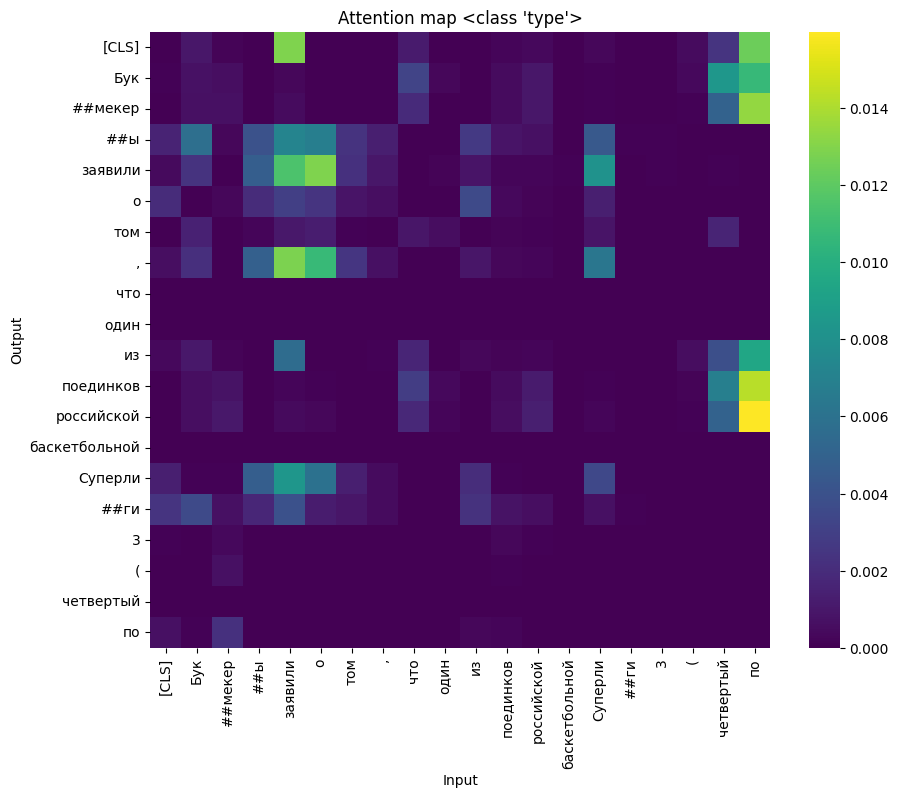

In [ ]:
input_text = "Букмекеры заявили о том, что один из поединков российской баскетбольной Суперлиги 3 (четвертый по силе дивизион национального чемпионата) может носить договорной характер. Об этом сообщает «Рейтинг Букмекеров». Речь идет о матче, состоявшемся 25 февраля между клубами «Тегас» (Динской район, Краснодарский край) и «Эльбрус» (Черкесск). Подозрение у букмекеров  вызвал необычный интерес со стороны некоторых местных профессиональных баскетболистов, которые стали единственными клиентами одной из международных контор и сделали ставки на матч. Для всех из них ставки стали первыми после регистрации на сайте. Общая сумма составила 120 тысяч рублей. Личности игроков не сообщаются. Поединок завершился победой «Тегаса» со счетом 85:80, который занимает последнее место в чемпионате. «Эльбрус» находится строчкой выше."
# берем первые 20 токенов из входного текста, чтобы норм отобразить)
test_attention_map(model, input_text, type='encoder')

predict: снова вновь вновь вновь вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь


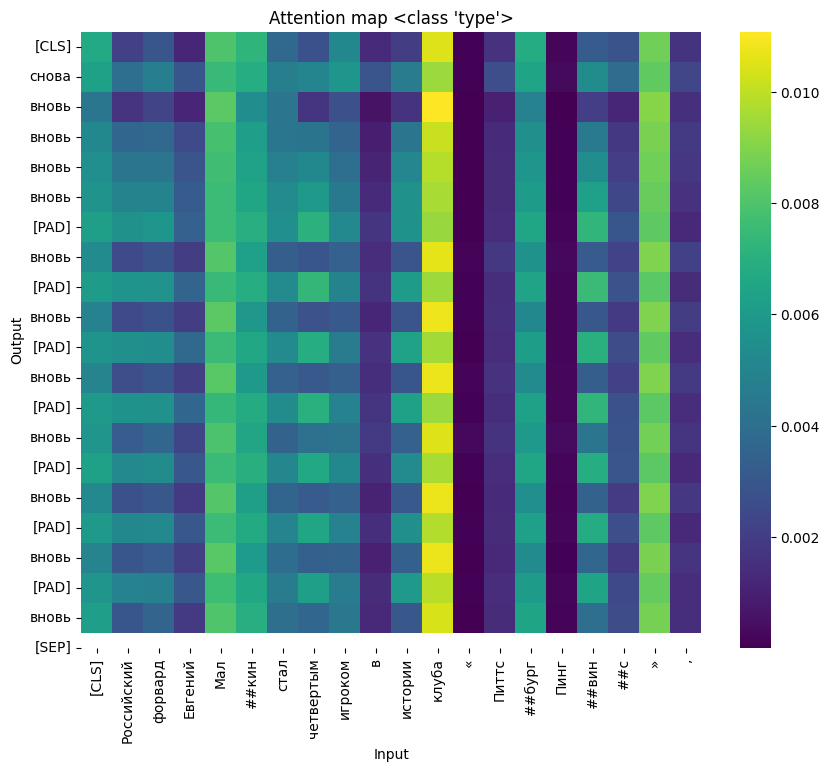

In [ ]:
input_text = "Российский форвард Евгений Малкин стал четвертым игроком в истории клуба «Питтсбург Пингвинс», которому удалось достигнуть отметки в 700 набранных очков (268 шайб плюс 432 передачи) в Национальной хоккейной лиге (НХЛ). Об этом сообщает официальный сайт лиги. Этот рубеж покорился ему в домашней игре регулярного чемпионата с «Эдмонтон Ойлерс» (6:4). Россиянин отметился в этой встрече результативной передачей. До Малкина столько же очков в составе «Питтсбурга» набирали Марио Лемье (1984-2006), Яромир Ягр (1990-2001) и нынешний капитан команды Сидни Кросби. В нынешнем сезоне на счету Малкина 28 заброшенных шайб и 40 голевых передач в 62 встречах регулярного чемпионата. «Питтсубрг» занимает пятое место в Восточной конференции."
# берем первые 20 токенов из входного текста, чтобы норм отобразить)
test_attention_map(model, input_text, type='decoder_enc')

predict: снова вновь снова снова вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь [PAD] вновь
['[CLS]', 'снова', 'вновь', 'снова', 'снова', 'вновь', '[PAD]', 'вновь', '[PAD]', 'вновь', '[PAD]', 'вновь', '[PAD]', 'вновь', '[PAD]', 'вновь', '[PAD]', 'вновь', '[PAD]', 'вновь', '[SEP]']


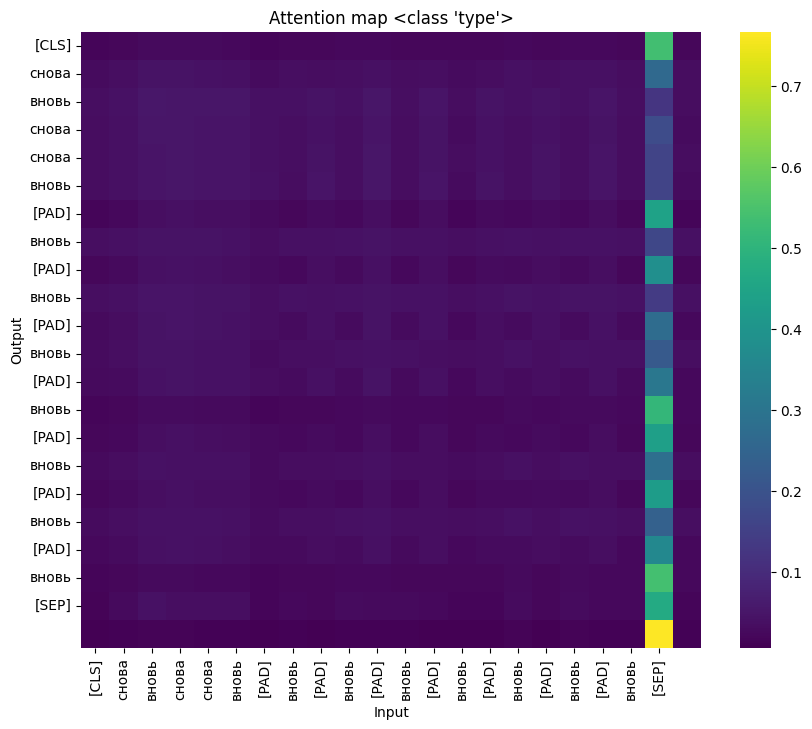

In [11]:
input_text = "В Туве потерпел аварию вертолет Ми-8, на борту которого находились 14 человек. Все они остались живы и были эвакуированы с места происшествия, передает ""Интерфакс"". Как сообщили информагентству в Управлении информации МЧС РФ, вертолет с геологами вылетел из Кызыла в направлении пункта Малый Енисей. В 12:05 по московскому времени связь с экипажем была потеряна. Через несколько часов Ми-8 был обнаружен в районе одной из сопок в устье реки Ханга. Машина лежит на боку. Причины аварии и другие подробности происшествия пока неизвестны."
test_attention_map(model, input_text, type='decoder_self')